In [2]:
VN30_2019 = ["VNM",'TCB','VIC','MSN','HPG','VPB','VHM','VJC',
             'MWG','MBB','SAB','VCB','HDB','FPT','STB','NVL',
             'EIB','VRE','PNJ','GAS','SSI','CTG','GMD','CTD',
             'ROS','REE','SBT','CII','DPM','DHG']

In [3]:
from vnstock3 import Vnstock
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
# Fetch historical data for VN30
vnindex_data = Vnstock().stock(symbol='VN30')
vnindex_data = vnindex_data.quote.history(start='2017-08-24', end='2019-01-03')
vnindex_data['Return'] = vnindex_data['close'].pct_change()

beta_values = {}

2024-08-04 00:52:59,015 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [5]:
for symbol in VN30_2019:
    # Fetch historical data for each stock in VN30
    stock_data = Vnstock().stock(symbol=symbol)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    stock_data['Return'] = stock_data['close'].pct_change()

    # Merge the dataframes on date
    merged_data = pd.merge(stock_data[['time', 'Return']], vnindex_data[['time', 'Return']], on='time', suffixes=('_STOCK', '_VN30'))
    merged_data.dropna(inplace=True)  # Drop rows with NaN values

    # Perform linear regression to calculate beta
    if not merged_data.empty:
        beta, alpha, r_value, p_value, std_err = stats.linregress(merged_data['Return_VN30'], merged_data['Return_STOCK'])
        beta_values[symbol] = beta

2024-08-04 00:52:59,443 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:00,016 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:05,306 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:05,571 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:05,968 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:06,197 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:06,798 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:07,008 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [6]:
beta_values

{'VNM': np.float64(0.5965937688405157),
 'TCB': np.float64(1.0764264817117575),
 'VIC': np.float64(0.8241595078508411),
 'MSN': np.float64(1.1045779494272328),
 'HPG': np.float64(1.179324276052169),
 'VPB': np.float64(1.4417196755697967),
 'VHM': np.float64(0.3731951135562362),
 'VJC': np.float64(1.0280246438457112),
 'MWG': np.float64(1.017259845267381),
 'MBB': np.float64(1.2976559985608098),
 'SAB': np.float64(0.5108835789475535),
 'VCB': np.float64(1.3703396896137796),
 'HDB': np.float64(1.0938806410374688),
 'FPT': np.float64(0.9342534417597422),
 'STB': np.float64(1.2614676897495662),
 'NVL': np.float64(0.4187236086612735),
 'EIB': np.float64(0.48604185208301937),
 'VRE': np.float64(1.0631064938536783),
 'PNJ': np.float64(1.1110074409194763),
 'GAS': np.float64(1.435426662604883),
 'SSI': np.float64(1.461968187789989),
 'CTG': np.float64(1.6268810427271),
 'GMD': np.float64(0.8620222896541818),
 'CTD': np.float64(0.7046146819435494),
 'ROS': np.float64(0.8884887015298932),
 'REE'

In [7]:
vnindex_data

,time,open,high,low,close,volume,Return
0,2017-08-24 07:00:00,743.23,749.82,742.34,747.72,33630890,NaN
1,2017-08-25 07:00:00,746.87,751.14,746.87,751.14,32784240,0.004574
2,2017-08-28 07:00:00,751.59,758.02,749.20,758.02,42763860,0.009159
3,2017-08-29 07:00:00,757.84,758.76,754.59,754.59,44549640,-0.004525
4,2017-08-30 07:00:00,756.49,764.57,755.32,764.57,34232490,0.013226
...,...,...,...,...,...,...,...
335,2018-12-25 07:00:00,873.56,873.56,850.33,865.69,51475970,-0.009100
336,2018-12-26 07:00:00,865.96,867.88,860.52,861.02,32704590,-0.005395
337,2018-12-27 07:00:00,861.53,872.73,861.53,865.45,35751060,0.005145
338,2018-12-28 07:00:00,866.04,868.62,854.99,854.99,38254570,-0.012086


In [8]:
def calculate_return(df):
    if df.empty:
        return 0
    first_price = df['close'].iloc[0]
    final_price = df['close'].iloc[-1] 
    stock_return = ((final_price - first_price)/first_price) * 100
    return stock_return

In [9]:
stock_return = {}

for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    return_rate = calculate_return(stock_data)
    stock_return[stock] = return_rate


2024-08-04 00:53:17,808 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:18,410 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:18,719 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:19,211 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:19,482 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:19,822 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:20,586 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 00:53:20,798 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [10]:
stock_return

{'VNM': np.float64(4.116161616161604),
 'TCB': np.float64(-25.01510574018127),
 'VIC': np.float64(178.9934354485777),
 'MSN': np.float64(70.8758731864589),
 'HPG': np.float64(27.937336814621418),
 'VPB': np.float64(-13.448735019973364),
 'VHM': np.float64(-16.858297078931013),
 'VJC': np.float64(62.00586674116496),
 'MWG': np.float64(9.665579119086464),
 'MBB': np.float64(8.36820083682008),
 'SAB': np.float64(0.5166744950681045),
 'VCB': np.float64(49.65337954939342),
 'HDB': np.float64(-26.149914821124366),
 'FPT': np.float64(4.279891304347819),
 'STB': np.float64(-1.276595744680854),
 'NVL': np.float64(34.975554719819485),
 'EIB': np.float64(17.18009478672987),
 'VRE': np.float64(-13.001555209953345),
 'PNJ': np.float64(35.51020408163266),
 'GAS': np.float64(51.54872828003022),
 'SSI': np.float64(16.71525753158407),
 'CTG': np.float64(4.2763157894736805),
 'GMD': np.float64(-14.559234144395687),
 'CTD': np.float64(-20.92889908256882),
 'ROS': np.float64(-54.11018530033578),
 'REE': n

In [11]:
stock_return_series = pd.Series(stock_return)
market_return = stock_return_series.mean()/100
market_return

np.float64(0.10167552728995828)

In [12]:
risk_free = [0.0598, 0.0471]
risk_free = pd.Series(risk_free)
R_f = risk_free.mean()
R_f

np.float64(0.05345)

In [13]:
df = pd.DataFrame(list(beta_values.items()), columns=['Stock', 'Beta'])

# Calculate the expected return using the CAPM formula
df['Expected Return'] = R_f + df['Beta'] * (market_return - R_f) *100
df

,Stock,Beta,Expected Return
0,VNM,0.596594,2.930555
1,TCB,1.076426,5.244573
2,VIC,0.824160,4.028003
3,MSN,1.104578,5.380335
4,HPG,1.179324,5.740804
5,VPB,1.441720,7.006219
6,VHM,0.373195,1.853203
7,VJC,1.028025,5.011153
8,MWG,1.017260,4.959239
9,MBB,1.297656,6.311464


In [14]:
top5_return = df.sort_values(by='Expected Return', ascending=False).head(5)
least_return = df.sort_values(by='Expected Return').head(5)
return_sorted = df.sort_values(by='Expected Return').reset_index(drop=True)
median_index = len(return_sorted) // 2
if len(return_sorted) % 2 == 0:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]
else:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]

print(median_stocks)
print(top5_return)
print(least_return)

   Stock      Beta  Expected Return
13   FPT  0.934253         4.558936
14   REE  0.966392         4.713926
15   MWG  1.017260         4.959239
16   VJC  1.028025         5.011153
17   VRE  1.063106         5.180337
   Stock      Beta  Expected Return
21   CTG  1.626881         7.899170
20   SSI  1.461968         7.103869
5    VPB  1.441720         7.006219
19   GAS  1.435427         6.975871
11   VCB  1.370340         6.661985
   Stock      Beta  Expected Return
6    VHM  0.373195         1.853203
27   CII  0.410483         2.033027
15   NVL  0.418724         2.072767
16   EIB  0.486042         2.397412
10   SAB  0.510884         2.517213


In [15]:
top5_beta = df.sort_values(by='Beta', ascending=False).head(5)
least_beta = df.sort_values(by='Beta').head(5)
beta_sorted = df.sort_values(by='Beta').reset_index(drop=True)
median_index = len(beta_sorted) // 2
if len(beta_sorted) % 2 == 0:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]
else:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]

print(median_stocks)
print(top5_beta)
print(least_beta)

   Stock      Beta  Expected Return
13   FPT  0.934253         4.558936
14   REE  0.966392         4.713926
15   MWG  1.017260         4.959239
16   VJC  1.028025         5.011153
17   VRE  1.063106         5.180337
   Stock      Beta  Expected Return
21   CTG  1.626881         7.899170
20   SSI  1.461968         7.103869
5    VPB  1.441720         7.006219
19   GAS  1.435427         6.975871
11   VCB  1.370340         6.661985
   Stock      Beta  Expected Return
6    VHM  0.373195         1.853203
27   CII  0.410483         2.033027
15   NVL  0.418724         2.072767
16   EIB  0.486042         2.397412
10   SAB  0.510884         2.517213


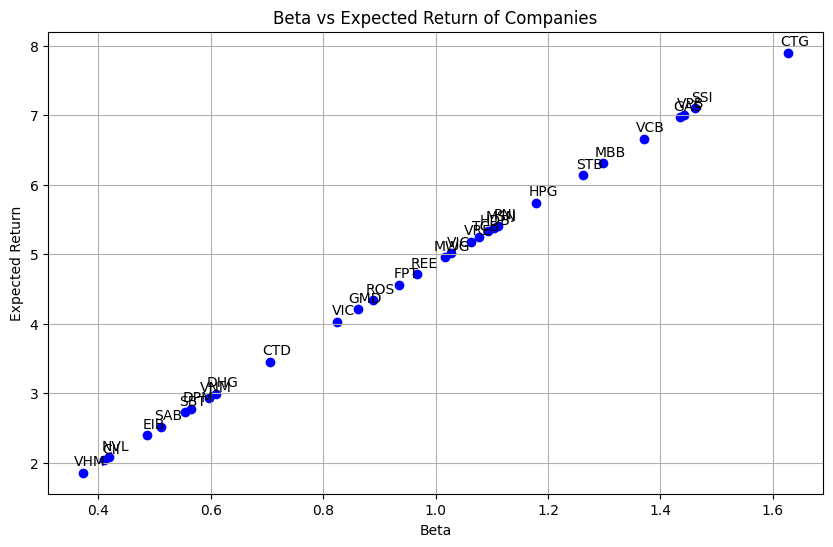

In [16]:
import matplotlib.pyplot as plt

# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], df['Expected Return'], color='blue')

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], df['Expected Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Expected Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

In [26]:
real_return = {}
for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2019-01-01', end='2024-01-03')
    return_rate = calculate_return(stock_data)
    real_return[stock] = return_rate

2024-08-04 01:06:24,302 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 01:06:25,209 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 01:06:25,881 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 01:06:26,206 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 01:06:26,478 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 01:06:27,298 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 01:06:27,732 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-04 01:06:28,269 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [27]:
real_stock_return = pd.Series(real_return)
real_stock_return = pd.DataFrame(real_stock_return, columns=['Return'])
real_stock_return

,Return
VNM,-18.227019
TCB,25.463336
VIC,-50.700280
MSN,7.547170
HPG,154.591837
VPB,175.384615
VHM,-19.641189
VJC,-7.742714
MWG,56.600967
MBB,137.323037


In [28]:
real_stock_return.sort_values(by='Return', ascending=False).head(5)

,Return
FPT,439.543974
GMD,225.957049
REE,181.360778
VPB,175.384615
SSI,170.607827


C:\Users\Admin\AppData\Local\Temp\ipykernel_22872\2039225582.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')


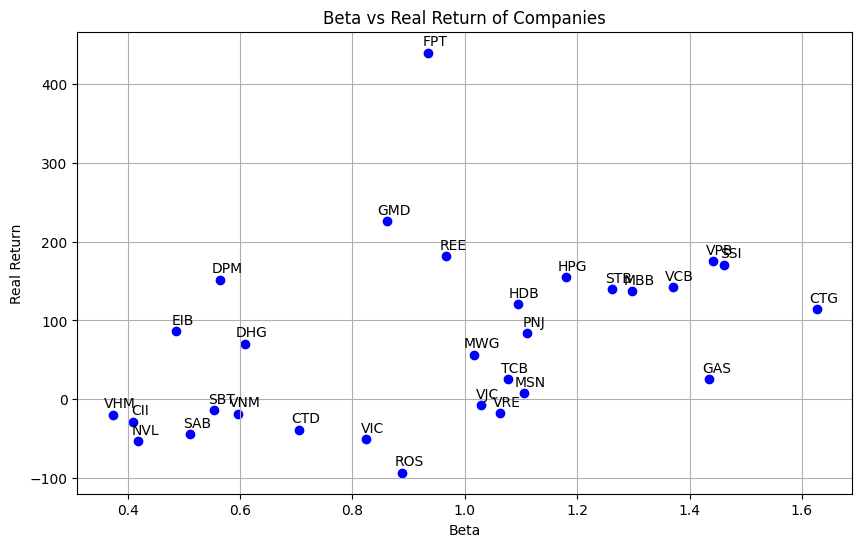

In [29]:
# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], real_stock_return['Return'], color='blue')

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Real Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Real Return')
plt.grid(True)
plt.show()